<a href="https://colab.research.google.com/github/Junseokee/Algorithm/blob/main/DFS%2CBFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DFS, BFS

### 큐 자료구조
- 먼저 들어온 데이터가 먼저 나가는 형식(선입선출)
- 큐는 입구와 출구가 모두 뚫려있는 터널과 같은 형태로 시각화 할 수 있다.

In [ ]:
from collections import deque

# 큐(Queue) 구현을 위해 deque 라이브러리 사용
queue = deque()

# 삽입(5) - 삽입(2) - 삽입(3) - 삽입(7) - 삭제() - 삽입(1) - 삽입(4) - 삭제()
queue.append(5)
queue.append(2)
queue.append(3)
queue.append(7)
queue.popleft()
queue.append(1)
queue.append(4)
queue.popleft()

print(queue) # 먼저 들어온 순서대로 출력
queue.reverse() # 역순으로 바꾸기
print(queue) # 나중에 들어온 원소부터 출력

deque([3, 7, 1, 4])
deque([4, 1, 7, 3])


### 재귀함수(Recursive Function)
- 재귀함수란 자기 자신을 다시 호출하는 함수를 의미합니다.

- 단순한 형태의 재귀 함수 예제
  - 재귀함수를 호출합니다. 라는 문자열을 무한히 출력합니다.
  - 어느 정도 출력하다가 최대 재귀 깊이 초과 메세지가 출력됩니다.

In [ ]:
def recursive_function():
  print('재귀 함수를 호출합니다.')
  recursive_function()
recursive_function()

### 재귀함수의 종료 조건
- 재귀 함수를 문제 풀이에서 사용할 때는 재귀 함수의 종료 조건을 반드시 명시해야 합니다.
- 종료 조건을 제대로 명시하지 않으면 함수가 무한히 호출될 수 있습니다.
  - 종료 조건을 포함한 재귀 함수 예제

In [2]:
def recursive_function(i):
  # 100번째 호출을 했을 때 종료되도록 종료 조건 명시
  if i == 5:
    return
  print(i,'번째 재귀 함수에서', i+1,'번째 재귀함수를 호출합니다.')
  recursive_function(i+1)
  print(i,'번째 재귀함수를 종료합니다.')

recursive_function(1)

1 번째 재귀 함수에서 2 번째 재귀함수를 호출합니다.
2 번째 재귀 함수에서 3 번째 재귀함수를 호출합니다.
3 번째 재귀 함수에서 4 번째 재귀함수를 호출합니다.
4 번째 재귀 함수에서 5 번째 재귀함수를 호출합니다.
4 번째 재귀함수를 종료합니다.
3 번째 재귀함수를 종료합니다.
2 번째 재귀함수를 종료합니다.
1 번째 재귀함수를 종료합니다.


### 팩토리얼 구현 예제
- n! = 1 X 2 X 3 X ''' x(n-1) X n
- 수학적으로 0!과 1!의 값은 1입니다.



In [ ]:
# 반복적으로 구현한 n!
def factorial_iterative(n):
  result = 1
  # 1부터 n까지의 수를 차례대로 곱하기
  for i in range(1, n+1):
    result *= i
  return result
print('반복적으로 구현: ', factorial_iterative(5))

반복적으로 구현:  120


In [ ]:
# 재귀적으로 구현한 n!
def factorial_recursive(n):
  if n <= 1: # n이 1 이하인 경우 1을 반환
    return 1
  # n! n * (n -1)!를 그대로 코드로 작성하기
  return n * factorial_recursive(n-1)

print('재귀적으로 구현: ', factorial_recursive(5))

재귀적으로 구현:  120


### 최대공약수 계산(유클리드 호제법) 예제

- 두 개의 자연수에 대한 최대공약수를 구하는 대표적인 알고리즘으로는 유클리드 호제법이 있습니다.
- 유클리드 호제법
  - 두 자연수 A, B에 대하여 (A>B) A를 B로 나눈 나머지를 R이라고 합시다.
  - 이때 A와 B의 최대공약수는 B와 R의 최대공약수와 같습니다.
- 유클리드 호제법의 아이디어를 그대로 재귀 함수로 작성할 수 있습니다.
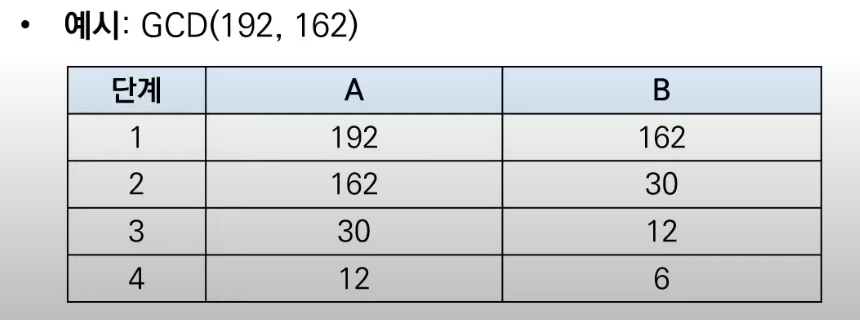
  

In [4]:
def gcd(a,b):
  if a%b == 0:
    return b
  else:
    print(b, a%b)
    return gcd(b, a%b)

print(gcd(150,50))

50


### 재귀 함수 사용의 유의 사항
- 재귀 함수를 잘 활용하면 복잡한 알고리즘을 간결하게 작성할 수 있습니다.
   - 단 오히려 다른 사람이 이해하기 어려운 형태의 코드가 될 수 도 있으므로 신중하게 사용해야 합니다.
- 모든 재귀 함수는 반복문을 이용하여 동일한 기능을 구현할 수 있습니다.
- 재귀 함수가 반복문보다 유리한 경우도 있고 불리한 경우도 있습니다.
- 컴퓨터가 함수를 연속적으로 호출하면 컴퓨터 메모리 내부의 스택프레임에 쌓입니다.
  - 그래서 스택을 사용해야 할 때 구현상 스택 라이브러리 대신에 재귀 함수를 이용하는 경우가 많습니다.

## DFS(Depth-First Search)
- DFS는 깊이 우선 탐색이라고도 부르며 그래프에서 깊은 부분을 우선적으로 탐색하는 알고리즘입니다.
- DFS는 스택 자료구조(혹은 재귀 함수)를 이용하며, 구체적인 동작 과정은 다음과 같습니다.
  1. 탐색 시작 노드를 스택에 삽입하고 방문 처리를 합니다.
  2. 스택의 최상단 노드에 방문하지 않은 인접한 노드가 하나라도 있으면 그 노드를 스택에 넣고 방문 처리합니다. 방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼냅니다.
  3. 더 이상 2번의 과정을 수행할 수 없을 때까지 반복합니다.

In [22]:
# DFS 메서드 정의
def dfs(graph, v, visited):
  # 현재 노드를 방문 처리
  visited[v] = True
  print(v) # end=' '
  # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
  for i in graph[v]:
    print(i,"로 감") 
    if not visited[i]:
      dfs(graph, i, visited)

In [23]:
# 각 노드가 연결된 정보를 표현 (2차원 리스트)
graph = [
  [], # 0번 인덱스는 빈칸으로 둠
  [2,3,8],
  [1,7],
  [1,4,5],
  [3,5],
  [3,4],
  [7],
  [2,6,8],
  [1,7]    
]

# 각 노드가 방문된 정보를 표현 (1차원 리스트)
visited = [False] * 9

# 정의된 DFS 함수 호출
dfs(graph, 1, visited)

1
2 로 감
2
1 로 감
7 로 감
7
2 로 감
6 로 감
6
7 로 감
8 로 감
8
1 로 감
7 로 감
3 로 감
3
1 로 감
4 로 감
4
3 로 감
5 로 감
5
3 로 감
4 로 감
5 로 감
8 로 감


## BFS (Breadth-First Search)
- BFS는 너비 우선 탐색이라고도 부르며, 그래프에서 가까운 노드부터 우선적으로 탐색하는 알고리즘입니다.
- BFS는 큐 자료구조를 이용하며, 구체적인 동작 과정은 다음과 같습니다.
  1. 탐색 시작 노들르 큐에 삽입하고 방문 처리를 합니다.
  2. 큐에서 노드를 꺼낸 뒤에 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문 처리합니다.
  3. 더 이상 2번의 과정을 수행할 수 없으 때까지 반복합니다.

- 최단거리 문제에 자주 사용

In [ ]:
from collections import deque

# BFS 메서드 정의
def bfs(graph, start, visited):
  # 큐(Queue) 구현을 위해 deque 라이브러리 사용
  queue = deque([start])
  # 현재 노드를 방문 처리
  visited[start] = True
  # 큐가 빌 때까지 반복
  while queue:
    # 큐에서 하나의 원소를 뽑아 출력하기
    v = queue.popleft()
    print(v, end=' ')
    # 아직 방문하지 않은 인접한 원소들을 큐에 삽입
    for i in graph[v]:
      if not visited[i]:
        queue.append(i)
        visited[i] = True

In [ ]:
from collections import deque

# BFS 메서드 정의
def bfs(graph, start, visited):
  queue = deque([start])
  visited[start] = True
  while queue:
    v = queue.popleft()
    print(v, end=' ')
    for i in graph[v]:
      if not visited[i]:
        queue.append(i)
        visited[i] = True

In [ ]:
# 각 노드가 연결된 정보를 표현 (2차원 리스트)
graph = [
    # x번째 인덱스가 인접해있는 노드를 리스트로 입력
  [], # 0번 인덱스는 빈칸으로 둠
  [2,3,8],
  [1,7],
  [1,4,5],
  [3,5],
  [3,4],
  [7],
  [2,6,8],
  [1,7]    
]

# 각 노드가 방문된 정보를 표현 (1차원 리스트)
visited = [False] * 9

# 정의된 DFS 함수 호출
bfs(graph, 1, visited)

1 2 3 8 7 4 5 6 

## BFS, DFS 문제 예시

### <문제> 음료수 얼려 먹기:
- N x M 크기의 얼음 틀이 있습니다. 구멍이 뚫려 있는 부분은 0, 칸막이가 존재하는 부분은 1로 표시됩니다.
구멍이 뚫려있는 부분끼리 상, 하 좌, 우로 붙어 있는 경우 서로 연결되어 있는 것으로 간주합니다.
이때 얼음 틀의 모양이 주어졌을 때 생성되는 총 아이스크림의 개수를 구하는 프로그램을 작성하세요. 다음의 4 x 5 얼음 틀 예시에서는 아이스크림이 총 3개 생성됩니다.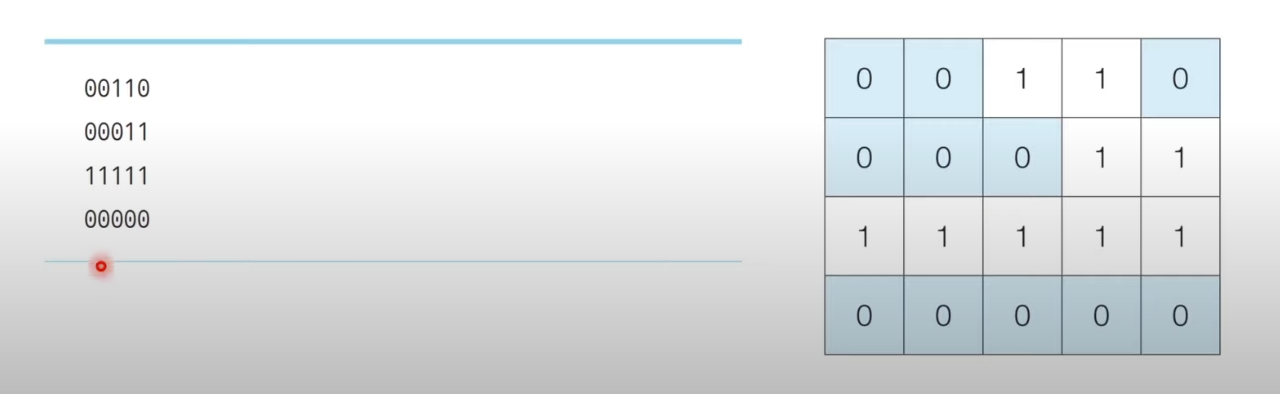

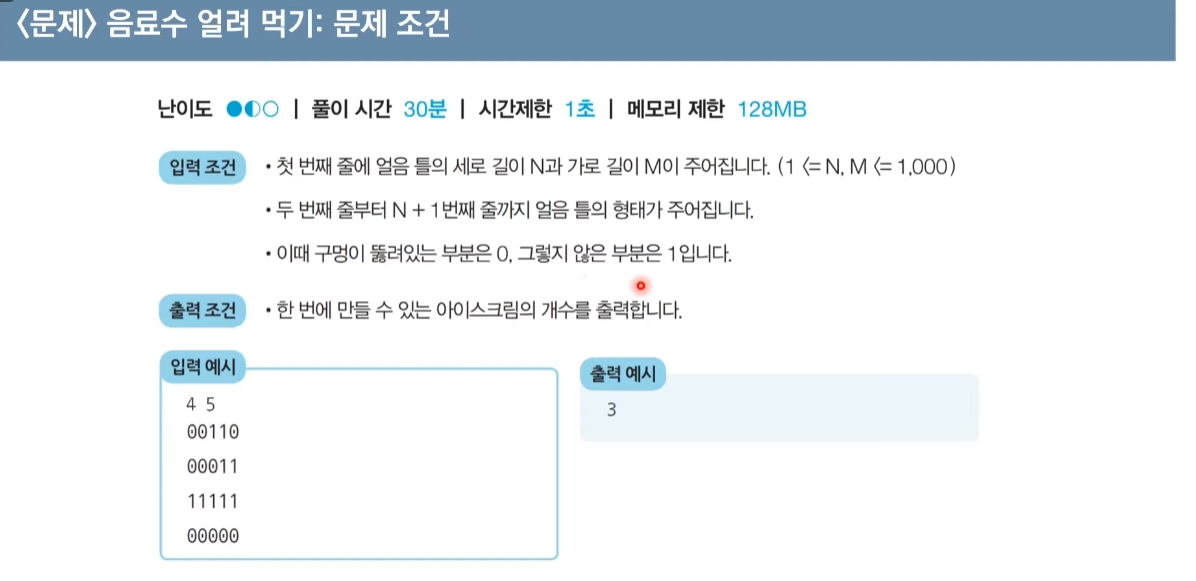

### 답안 예시

In [29]:
# DFS로 특정 노드를 방문하고 연결된 모든 노드들도 방문
def dfs(x,y):
  # 주어진 범위를 벗어나는 경우에는 즉시 종료
  if x <= -1 or x >= n or y <= -1 or y >= m:
    return False
  # 현재 노드를 아직 방문하지 않았다면
  if graph[x][y] == 0:
    print(x,y)
    # 해당 노드 방문 처리한 후
    graph[x][y] = 1
    # 상, 하, 좌, 우의 위치들 + 주변 모든노드 재귀적으로 호출
    dfs(x-1, y) 
    dfs(x, y-1)
    dfs(x+1, y)
    dfs(x, y+1)
    # 근처 모든 노드가 1이 되면 True 반환
    return True
  return False

In [30]:
# N, M 입력 받기
n, m = map(int, input().split())

# 2차원 리스트 생성
graph = [] 
for i in range(n):
  graph.append(list(map(int, input())))

# 모든 노드에 대하여 음료수 채우기
result = 0
for i in range(n):
  for j in range(m):
    # 현재 위치에서 DFS 수행
    if dfs(i, j) == True:
      result += 1

print(result)

4 5
00110
00011
11111
00000
0 0
1 0
1 1
0 1
1 2
0 4
3 0
3 1
3 2
3 3
3 4
3


### <문제> 미로 탈출
- 동빈이는 N X M 크기의 직사각형 형태의 미로에 갇혔습니다. 미로에는 여러 마리의 괴물이 있어 이를 피해 탈출해야 합니다.
- 동빈이의 위치는 (1,1)이며 미로의 출구는 (N,M)의 위치에 존재하며 한 번에 한 칸씩 이동할 수 있습니다. 이때 괴물이 있는 부분은 0으로, 괴물이 없는 부분은 1로 표시되어 있습니다. 미로는 반드시 탈출할 수 있는 형태로 제시 됩니다.
- 이때 동빈이가 탈출하기 위해 움직여야 하는 최소 칸의 개수를 구하세요. 칸을 셀 때는 시작 칸과 마지막 칸을 모두 포함해서 계산합니다.


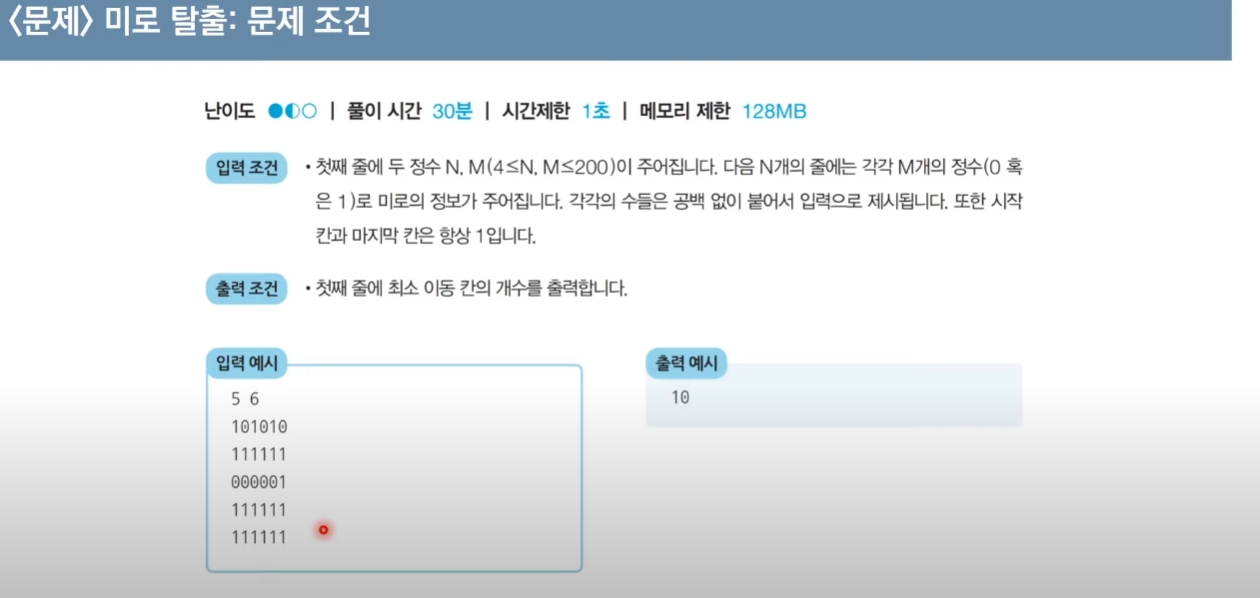

### 문제 풀이
BFS는 간선의 비용이 모두 같을때 사용 ex) 최단거리 탐색

In [52]:
# BFS 소스코드 구현
def bfs(x, y):
  # 큐(Queue) 구현을 위해 deque 라이브러리 사용
  queue = deque()
  queue.append((x,y))
  # 큐가 빌 때까지 반복하기
  while queue:
    x,y = queue.popleft()
    # 현재 위치에서 4가지 방향으로의 위치 확인
    for i in range(4):
      nx = x + dx[i]
      ny = y + dy[i]
      # 미로 찾기 공간을 벗어난 경우 무시
      if nx < 0 or nx >= n or ny < 0 or ny >= m:
        continue
      # 벽인 경우 무시
      if graph[nx][ny] == 0:
        continue
      # 해당 노드를 처음 방문하는 경우에만 최단 거리 기록
      if graph[nx][ny] == 1:
        graph[nx][ny] = graph[x][y] + 1
        queue.append((nx,ny))
  # 가장 오른쪽 아래까지의 최단 거리 반환
  return graph[n-1][m-1]

In [53]:
from collections import deque

# N, M을 공백을 기준으로 구분하여 입력 받기
n, m = map(int, input().split())
# 2차원 리스트의 맵 정보 입력 받기
graph = []
for i in range(n):
  graph.append(list(map(int, input())))

# 이동할 네 가지 방향 정의 (상, 하, 좌, 우)
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

# BFS를 수행한 결과 출력
print(bfs(0, 0))

10


In [58]:
graph

[[3, 0, 5, 0, 7, 0],
 [2, 3, 4, 5, 6, 7],
 [0, 0, 0, 0, 0, 8],
 [14, 13, 12, 11, 10, 9],
 [15, 14, 13, 12, 11, 10]]

In [59]:
graph[3][4] 

11

In [60]:
groph

[[1, 0, 1, 0, 1, 0],
 [1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1]]

In [ ]:
groph